In [2]:
import pandas as pd

james_bond_data = pd.read_csv("jamesbond.csv").convert_dtypes()

In [3]:
james_bond_data.head()

,Year,Movie,Bond,Director,Composer,Writer,Cinematographer,Depicted_Film_Loc,Shooting_Loc,Bond_Car_MFG,...,Film_Length,Avg_User_IMDB,Avg_User_Rtn_Tom,Conquests,Martinis,BJB,Kills_Bond,Kills_Others,Top_100,Video_Game
0,1962,Dr. No,Sean Connery,Terence Young,Monty Norman,"Richard Maibaum, Johanna Harwood & Berkely Mather",Ted Moore,"Great Britain, Jamaic","England, Jamaica",Sunbeam,...,110,7.3,7.7,3,2,1,4,8,0,0
1,1963,From Russia with Love,Sean Connery,Terence Young,John Barry,Richard Maibaum & Johanna Harwood,Ted Moore,"United Kingdom, Great Britain, Turkey, Croatia...","England, Scotland, Italy, Switzerland, Turkey",Bently,...,115,7.5,8.0,4,0,0,11,16,0,1
2,1964,Goldfinger,Sean Connery,Guy Hamilton,John Barry,Richard Maibaum & Paul Dehn,Ted Moore,"United States, Great Britain, Switzerland","England, Switzerland, United States",Aston Martin,...,110,7.8,8.4,2,1,2,9,68,1,1
3,1965,Thunderball,Sean Connery,Terence Young,John Barry,Richard Maibaum & John Hopkins,Ted Moore,"France, Great Britain, Bahamas, United States","England, France, Bahamas, United States",Aston Martin,...,130,7.0,6.8,3,0,0,20,90,1,0
4,1967,You Only Live Twice,Sean Connery,Lewis Gilbert,John Barry,Roald Dahl,Freddie Young,"United States, Russia, Kazakhstan, Norway, Japan","Japan, Spain, Norway",Toyota,...,117,6.9,6.3,3,1,0,21,175,1,0


In [4]:
new_column_names = {
   ...:     "Release": "release_date",
   ...:     "Movie": "movie_title",
   ...:     "Bond": "bond_actor",
   ...:     "Bond_Car_MFG": "car_manufacturer",
   ...:     "US_Gross": "income_usa",
   ...:     "World_Gross": "income_world",
   ...:     "Budget ($ 000s)": "movie_budget",
   ...:     "Film_Length": "film_length",
   ...:     "Avg_User_IMDB": "imdb",
   ...:     "Avg_User_Rtn_Tom": "rotten_tomatoes",
   ...:     "Martinis": "martinis_consumed",
   ...:     "Kills_Bond": "bond_kills",
   ...: }
   ...:
   ...: data = james_bond_data.rename(columns=new_column_names)

In [5]:
data.columns

Index(['Year', 'movie_title', 'bond_actor', 'Director', 'Composer', 'Writer',
       'Cinematographer', 'Depicted_Film_Loc', 'Shooting_Loc',
       'car_manufacturer', 'Bond_Girl_Nat', 'income_usa', 'US_Adj',
       'income_world', 'World_Adj', 'Budget', 'Budget_Adj', 'film_length',
       'imdb', 'rotten_tomatoes', 'Conquests', 'martinis_consumed', 'BJB',
       'bond_kills', 'Kills_Others', 'Top_100', 'Video_Game'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24 non-null     Int64  
 1   movie_title        24 non-null     string 
 2   bond_actor         24 non-null     string 
 3   Director           24 non-null     string 
 4   Composer           24 non-null     string 
 5   Writer             24 non-null     string 
 6   Cinematographer    24 non-null     string 
 7   Depicted_Film_Loc  24 non-null     string 
 8   Shooting_Loc       24 non-null     string 
 9   car_manufacturer   24 non-null     string 
 10  Bond_Girl_Nat      24 non-null     string 
 11  income_usa         24 non-null     Int64  
 12  US_Adj             24 non-null     Int64  
 13  income_world       24 non-null     Int64  
 14  World_Adj          24 non-null     Int64  
 15  Budget             24 non-null     Int64  
 16  Budget_Adj         24 non-nu

In [7]:
data.loc[data.isna().any(axis="columns")]

,Year,movie_title,bond_actor,Director,Composer,Writer,Cinematographer,Depicted_Film_Loc,Shooting_Loc,car_manufacturer,...,film_length,imdb,rotten_tomatoes,Conquests,martinis_consumed,BJB,bond_kills,Kills_Others,Top_100,Video_Game


In [9]:
pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}})

,imdb,rotten_tomatoes
10,7.1,6.8


In [11]:
data = (
    james_bond_data.rename(columns=new_column_names)
    .combine_first(
        pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}})
    )
    .assign(
        income_usa=lambda data: (
            data["income_usa"]
            .replace("[$,]", "", regex=True)
            .astype("Float64")
        ),
    )
)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BJB                24 non-null     Int64  
 1   Bond_Girl_Nat      24 non-null     string 
 2   Budget             24 non-null     Int64  
 3   Budget_Adj         24 non-null     Int64  
 4   Cinematographer    24 non-null     string 
 5   Composer           24 non-null     string 
 6   Conquests          24 non-null     Int64  
 7   Depicted_Film_Loc  24 non-null     string 
 8   Director           24 non-null     string 
 9   Kills_Others       24 non-null     Int64  
 10  Shooting_Loc       24 non-null     string 
 11  Top_100            24 non-null     Int64  
 12  US_Adj             24 non-null     Int64  
 13  Video_Game         24 non-null     Int64  
 14  World_Adj          24 non-null     Int64  
 15  Writer             24 non-null     string 
 16  Year               24 non-nu

In [13]:
data["bond_actor"].value_counts()

Roger Moore       7
Sean Connery      6
Pierce Brosnan    4
Daniel Craig      4
Timothy Dalton    2
George Lazenby    1
Name: bond_actor, dtype: Int64

In [14]:
data[["film_length", "martinis_consumed"]].describe()

,film_length,martinis_consumed
count,24.0,24.0
mean,126.833333,1.083333
std,10.961064,1.316011
min,106.0,0.0
25%,119.75,0.0
50%,127.5,1.0
75%,131.5,1.0
max,148.0,6.0


In [15]:
data.loc[data.duplicated(keep=False)]

,BJB,Bond_Girl_Nat,Budget,Budget_Adj,Cinematographer,Composer,Conquests,Depicted_Film_Loc,Director,Kills_Others,...,bond_actor,bond_kills,car_manufacturer,film_length,imdb,income_usa,income_world,martinis_consumed,movie_title,rotten_tomatoes


In [17]:
In [36]: data.to_csv("james_bond_data_cleansed.csv", index=False)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("james_bond_data_cleansed.csv").convert_dtypes()

C:\Users\yashm\AppData\Local\Temp\ipykernel_4860\4234930976.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


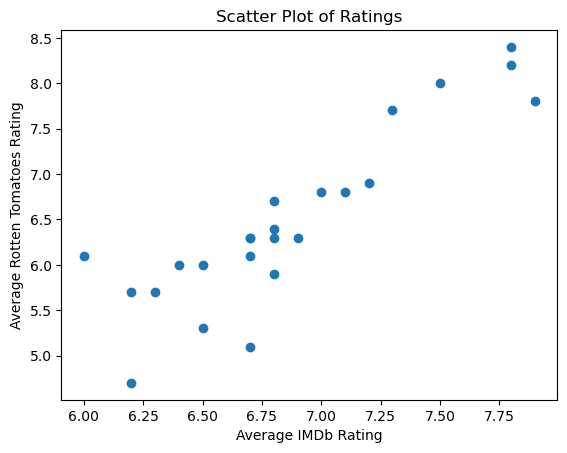

In [19]:
fig, ax = plt.subplots()
ax.scatter(data["imdb"], data["rotten_tomatoes"])
ax.set_title("Scatter Plot of Ratings")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Average Rotten Tomatoes Rating")
fig.show()

In [20]:
from sklearn.linear_model import LinearRegression

x = data.loc[:, ["imdb"]]
y = data.loc[:, "rotten_tomatoes"]

In [21]:
model = LinearRegression()
model.fit(x, y)

r_squared = f"R-Squared: {model.score(x, y):.2f}"
best_fit = f"y = {model.coef_[0]:.4f}x{model.intercept_:+.4f}"
y_pred = model.predict(x)

C:\Users\yashm\AppData\Local\Temp\ipykernel_4860\3276877428.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


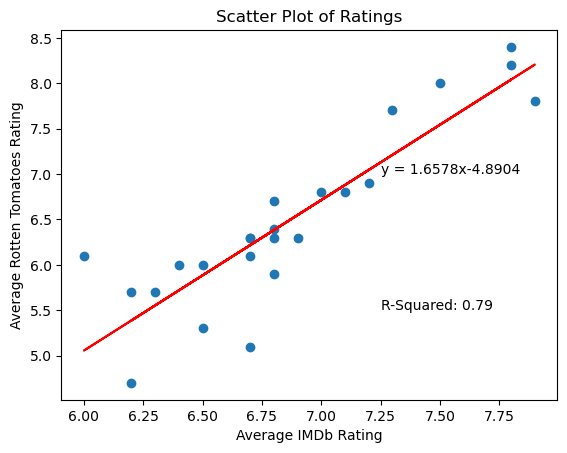

In [22]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_pred, color="red")
ax.text(7.25, 5.5, r_squared, fontsize=10)
ax.text(7.25, 7, best_fit, fontsize=10)
ax.set_title("Scatter Plot of Ratings")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Average Rotten Tomatoes Rating")
fig.show()

C:\Users\yashm\AppData\Local\Temp\ipykernel_4860\3582701217.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


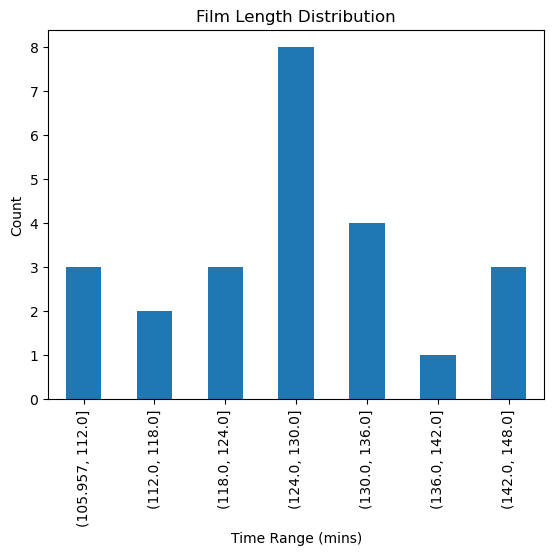

In [23]:
fig, ax = plt.subplots()
length = data["film_length"].value_counts(bins=7).sort_index()
length.plot.bar(
    ax=ax,
    title="Film Length Distribution",
    xlabel="Time Range (mins)",
    ylabel="Count",
)
fig.show()

In [24]:
data["film_length"].agg(["min", "max", "mean", "std"])

min     106.000000
max     148.000000
mean    126.833333
std      10.961064
Name: film_length, dtype: float64

C:\Users\yashm\AppData\Local\Temp\ipykernel_4860\2569888516.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


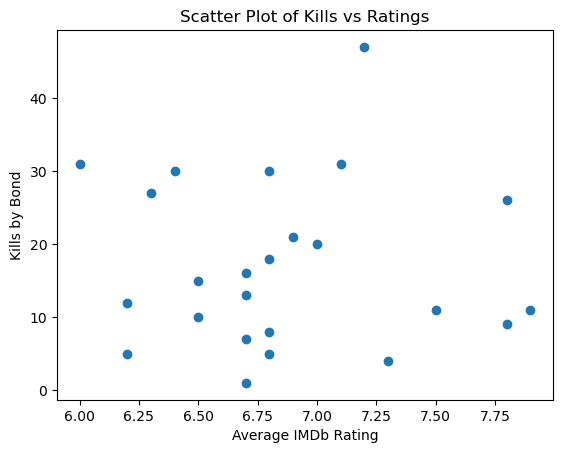

In [25]:
fig, ax = plt.subplots()
ax.scatter(data["imdb"], data["bond_kills"])
ax.set_title("Scatter Plot of Kills vs Ratings")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Kills by Bond")
fig.show()